# Fitting CO$_2$ data from Mauna Loa Observatory Reprise

Data taken from [NOAA ESRL](https://www.esrl.noaa.gov/gmd/ccgg/trends/)


Now that we have a toolbox of matrix tools, we can compute polynomial fits directly for arbitrary polynomial order without calculating the variables individually. Recall that, given inputs $\{x_i,y_i\}$ with uncertainties $\{\sigma_i\}$, we can define the input vector 

$$
b_i = y_i / \sigma_i
$$

and then construct the solution for the coefficients $a_j$ as:


$$
\vec{a} = \left(A^TA\right)^{-1}A^T\vec{b}
$$

With the matrix "A" being the design matrix:

$$
A=\left[\begin{array}{cccc}{1 / \sigma_{0}} & {x_{0} / \sigma_{0}} & {x_{0}^{2} / \sigma_{0}} & {\ldots} \\ {1 / \sigma_{1}} & {x_{1} / \sigma_{1}} & {x_{1}^{2} / \sigma_{1}} & {\ldots} \\ {\vdots} & {\vdots} & {\vdots} & {\ddots} \end{array}\right]
$$


The uncertainties can be read off from the diagonal elements of the covariance matrix

$$
C = \left(A^TA\right)^{-1}
$$




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from polyfit import polyfit
from read_co2 import read_co2

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

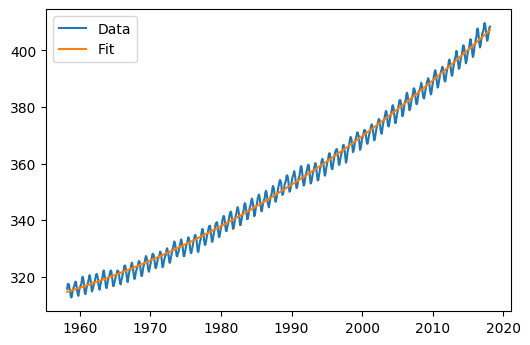

 chi-square/d.o.f. =  4.989437779776829
 a[  0] = +2.55e+04 +- +7.20e+04
 a[  1] = -1.60e+01 +- +1.09e+02
 a[  2] = -3.77e-03 +- +5.47e-02
 a[  3] = +2.74e-06 +- +9.17e-06


In [4]:
# Get the CO2 data
dates,data = read_co2('co2_mm_mlo.txt')

# Set uncertainties to 1 for all points
err = np.full_like(data, 1.)

# Fit to polynomial
M = 3
a, siga, C, chi2, yfit = polyfit(dates,data,err,M)

plt.plot( dates, data, label="Data")
plt.plot(dates,yfit, label="Fit")
plt.legend()
plt.show()

if len(data) - 3 > 0 :
    print (' chi-square/d.o.f. = ', chi2/(len(data)-3))
    for i in range(M+1):
        print ( ' a[%3d] = %+6.2e +- %+6.2e' % (i, a[i], siga[i]) )

